Statistical mechanics : entropy, order parameters, and complexity
James P. Sethna

**p.72 Temperature and equilibrium, (c)**:  *Plot the pendulum trajectory θ(t) for time
steps δ = 0.1, 0.01, and 0.001.*

Code based on:
Simple Pendulum ODESolver using python | by Benjamin Obi Tayo Ph.D. | Modern Physics | Medium
https://medium.com/modern-physics/simple-pendulum-odesolver-using-python-dcb30c267eee
Accessed: 2022-05-15

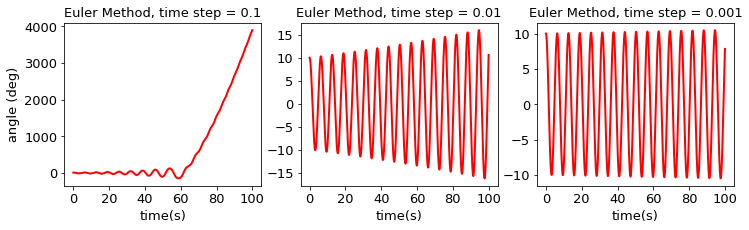

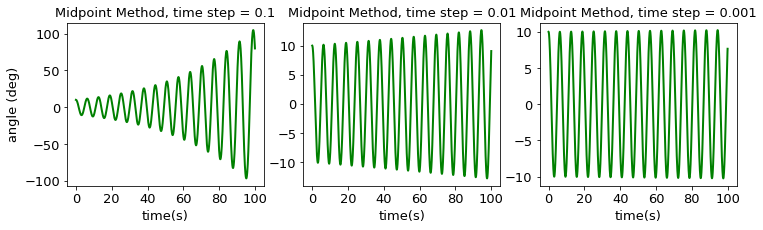

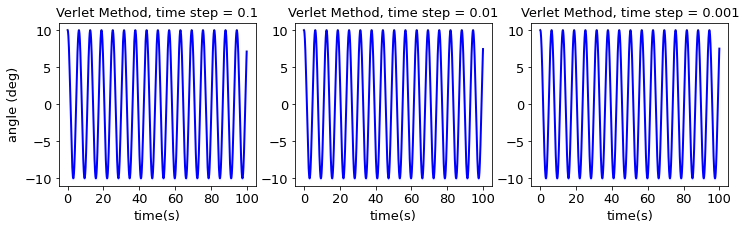

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

class ODESolver(object):
    
    def __init__(self, omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=10):
        self.omega_0 = omega_0  # initial angular velocity
        self.theta_0 = theta_0  # initial angular displacement
        self.eta = eta          # time step size
        self.n_iter = n_iter    # number of steps
        
    def euler(self,alpha):
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.theta_[0] = self.theta_0*np.pi/180.0
        
        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.eta
            self.omega_[i+1] = self.omega_[i] + self.eta*alpha(self.theta_[i])
            self.theta_[i+1] = self.theta_[i] + self.eta*self.omega_[i]
        return self
    
    def midpoint(self,alpha):
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.theta_[0] = self.theta_0*np.pi/180.0
        
        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.eta
            self.omega_[i+1] = self.omega_[i] + self.eta*alpha(self.theta_[i])
            self.theta_[i+1] = self.theta_[i] + 0.5*self.eta*(self.omega_[i]+self.omega_[i+1])
        return self
    
    def verlet(self,alpha):
        self.time_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.theta_[0] = self.theta_0*np.pi/180.0
        self.time_[1]= self.eta
        self.theta_[1] = self.theta_[0]+self.omega_0*self.eta +0.5* (self.eta**2)*alpha(self.theta_[0])
        
        for i in range(self.n_iter-2):
            self.time_[i+2] = self.time_[i+1] + self.eta
            self.theta_[i+2] = 2.0*self.theta_[i+1] -self.theta_[i] + (self.eta**2)*alpha(self.theta_[i+1])
        return self

def alpha(x):
    return -np.sin(x) # for simplicity factor g/L is set to be equal 1

time1=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=1000).euler(alpha).time_
theta1=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=1000).euler(alpha).theta_
time2=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.01, n_iter=10000).euler(alpha).time_
theta2=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.01, n_iter=10000).euler(alpha).theta_
time3=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.001, n_iter=100000).euler(alpha).time_
theta3=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.001, n_iter=100000).euler(alpha).theta_

plt.subplots(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(time1,theta1*180/np.pi,lw=2,color='red')
plt.xlabel('time(s)',size=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13) 
plt.ylabel('angle (deg)',size=13)
plt.title('Euler Method, time step = 0.1',size=13)
plt.subplot(1, 3, 2)
plt.plot(time2,theta2*180/np.pi,lw=2,color='red')
plt.xlabel('time(s)',size=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13) 
plt.title('Euler Method, time step = 0.01',size=13)
plt.subplot(1, 3, 3)
plt.plot(time3,theta3*180/np.pi,lw=2,color='red')
plt.xlabel('time(s)',size=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13) 
plt.title('Euler Method, time step = 0.001',size=13)
plt.show()

time1=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=1000).midpoint(alpha).time_
theta1=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=1000).midpoint(alpha).theta_
time2=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.01, n_iter=10000).midpoint(alpha).time_
theta2=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.01, n_iter=10000).midpoint(alpha).theta_
time3=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.001, n_iter=100000).midpoint(alpha).time_
theta3=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.001, n_iter=100000).midpoint(alpha).theta_

plt.subplots(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(time1,theta1*180/np.pi,lw=2,color='green')
plt.xlabel('time(s)',size=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13) 
plt.ylabel('angle (deg)',size=13)
plt.title('Midpoint Method, time step = 0.1',size=13)
plt.subplot(1, 3, 2)
plt.plot(time2,theta2*180/np.pi,lw=2,color='green')
plt.xlabel('time(s)',size=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13) 
plt.title('Midpoint Method, time step = 0.01',size=13)
plt.subplot(1, 3, 3)
plt.plot(time3,theta3*180/np.pi,lw=2,color='green')
plt.xlabel('time(s)',size=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13) 
plt.title('Midpoint Method, time step = 0.001',size=13)
plt.show()

time1=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=1000).verlet(alpha).time_
theta1=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=1000).verlet(alpha).theta_
time2=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.01, n_iter=10000).verlet(alpha).time_
theta2=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.01, n_iter=10000).verlet(alpha).theta_
time3=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.001, n_iter=100000).verlet(alpha).time_
theta3=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.001, n_iter=100000).verlet(alpha).theta_

plt.subplots(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13) 
plt.plot(time1,theta1*180/np.pi,lw=2,color='blue')
plt.xlabel('time(s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Verlet Method, time step = 0.1',size=13)
plt.subplot(1, 3, 2)
plt.plot(time2,theta2*180/np.pi,lw=2,color='blue')
plt.xlabel('time(s)',size=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13) 
plt.title('Verlet Method, time step = 0.01',size=13)
plt.subplot(1, 3, 3)
plt.plot(time3,theta3*180/np.pi,lw=2,color='blue')
plt.xlabel('time(s)',size=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13) 
plt.title('Verlet Method, time step = 0.001',size=13)
plt.show()